In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%matplotlib widget
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import davies_bouldin_score

In [3]:
data = pd.read_csv("/mnt/Data/code/machine_learning/course/intro_to_ML/intro_to_ML/project/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
data.drop(columns=["CUST_ID"], inplace=True)

In [6]:
print(data["CREDIT_LIMIT"].value_counts())
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mode()[0], inplace=True)

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64


In [7]:
print(data["MINIMUM_PAYMENTS"].value_counts())
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=True)

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64


In [8]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
len(data)

8950

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


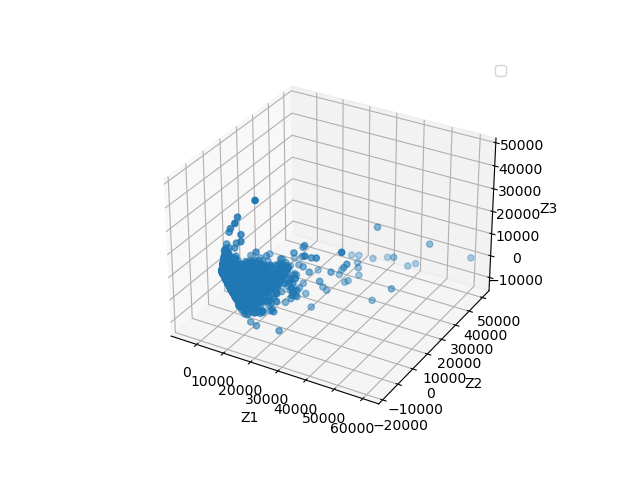

In [10]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(data)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')
ax.legend()
plt.show()

In [14]:
random_states = [10, 20, 30, 40, 50]
num_clusters = range(2, 20)
score_history = dict()

for k in num_clusters:
    scores = list()
    for rs in random_states:
        kmeans = KMeans(n_clusters=k, random_state=rs)
        kmeans.fit(data)
        score = davies_bouldin_score(data, kmeans.labels_)
        scores.append(score)
    avg_score = np.mean(scores)
    score_history[k] = avg_score

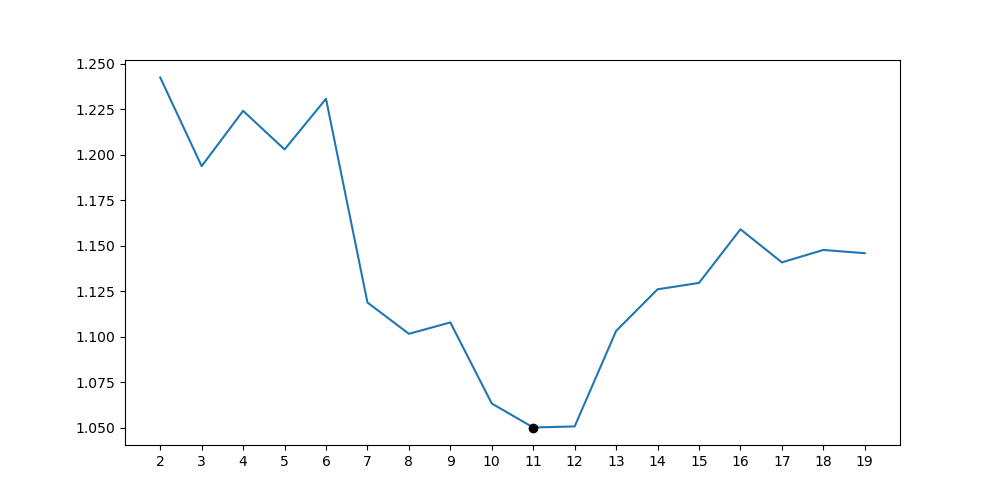

In [16]:
x = list(score_history.keys())
y = list(score_history.values())

num_cluster = x[np.argmin(y)]

plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2, 20, 1))
plt.plot(x, y)
plt.plot(num_cluster, min(y), "ko")
plt.show()

In [18]:
kmeans = KMeans(n_clusters=num_cluster, random_state=42)
y_pred = kmeans.fit_predict(data).reshape(-1, 1)

IndexError: list index out of range

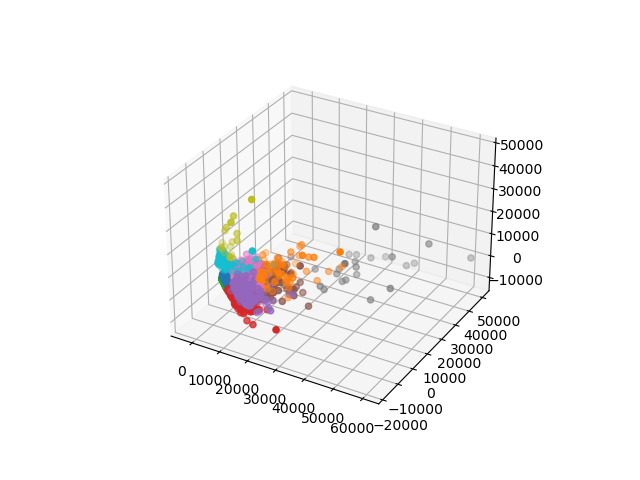

In [21]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(data)
X = np.concatenate([X_reduced, y_pred], axis=1)

fig = plt.figure()
ax = plt.axes(projection="3d")
colors = list(mcolors.TABLEAU_COLORS.keys())
for k in range(num_cluster):
    rows = np.where(X[:, 3] == k)
    ax.scatter3D(X[rows][:, 0], X[rows][:, 1], X[rows][:, 2], label=f"Cluster {k+1}", color=colors[k])
ax.set_xlabel("Z1")
ax.set_ylabel("Z2")
ax.set_zlabel("Z3")
ax.legend()
plt.show()

In [23]:
X = np.concatenate([data, y_pred], axis=1)
result = pd.DataFrame(X, columns=data.columns.tolist() + ["Cluster"]).groupby("Cluster")

In [25]:
result.get_group(0)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4.0,11.0,8000.0,1993.439277,2109.906490,0.0,12.0,0.0
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4.0,0.0,6000.0,1422.726707,1657.002877,0.0,11.0,0.0
37,4047.480828,1.000000,2380.55,1642.17,738.38,1697.660901,0.750000,0.500000,0.750000,0.333333,7.0,41.0,5000.0,1617.894416,1541.141605,0.0,12.0,0.0
38,6269.418144,1.000000,204.00,204.00,0.00,2925.699862,0.083333,0.083333,0.000000,0.333333,12.0,2.0,9000.0,1237.111661,2049.408839,0.0,12.0,0.0
42,4104.710798,1.000000,203.82,203.82,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,4500.0,868.275275,1801.264841,0.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,1704.571464,0.800000,0.00,0.00,0.00,4826.892774,0.000000,0.000000,0.000000,0.300000,12.0,0.0,5000.0,573.683142,480.409005,0.0,10.0,0.0
8813,3335.053583,0.700000,0.00,0.00,0.00,5823.467109,0.000000,0.000000,0.000000,0.300000,3.0,0.0,7000.0,931.371718,1006.983314,0.0,10.0,0.0
8839,3271.424058,0.888889,1173.28,0.00,1173.28,4122.912645,0.888889,0.000000,0.777778,0.333333,4.0,16.0,5000.0,817.177789,999.725550,0.0,9.0,0.0
8840,2588.410789,0.888889,787.40,0.00,787.40,3762.650329,0.777778,0.000000,0.666667,0.555556,10.0,17.0,3000.0,1739.406636,1769.001229,0.0,9.0,0.0


In [26]:
result.get_group(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
39,1411.602230,0.454545,963.24,963.24,0.00,6173.682877,0.083333,0.083333,0.000000,0.333333,6.0,6.0,7500.0,20071.07544,719.948985,0.333333,12.0,1.0
71,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27.0,33.0,7000.0,28232.69446,1107.030803,0.454545,12.0,1.0
133,9354.060450,1.000000,796.33,796.33,0.00,13748.471310,0.083333,0.083333,0.000000,0.666667,16.0,1.0,13000.0,10664.65866,2600.875721,0.083333,12.0,1.0
182,2881.253586,1.000000,117.00,0.00,117.00,17661.494860,0.250000,0.000000,0.166667,0.750000,28.0,3.0,4500.0,17301.83238,931.618475,0.166667,12.0,1.0
248,9612.215120,1.000000,319.92,0.00,319.92,13439.570400,1.000000,0.000000,1.000000,0.416667,12.0,12.0,12000.0,10993.89211,2501.560923,0.000000,12.0,1.0
274,5265.763713,1.000000,410.24,44.71,365.53,15452.977580,0.916667,0.083333,0.916667,0.333333,13.0,21.0,16500.0,12005.30740,1055.547896,0.083333,12.0,1.0
326,4194.033835,0.727273,2006.87,420.60,1586.27,0.000000,0.666667,0.083333,0.666667,0.000000,0.0,26.0,21000.0,19714.09728,1479.309409,0.100000,12.0,1.0
341,1132.386178,0.454545,2246.30,2246.30,0.00,14048.071810,0.333333,0.333333,0.000000,0.416667,20.0,8.0,6000.0,32048.61220,406.790252,0.800000,12.0,1.0
363,1903.688611,1.000000,6079.50,4719.50,1360.00,10227.228940,0.916667,0.250000,0.666667,0.250000,22.0,31.0,7300.0,18552.39489,762.263884,0.416667,12.0,1.0
482,198.035504,0.545455,0.00,0.00,0.00,14371.787890,0.000000,0.000000,0.000000,0.250000,3.0,0.0,10000.0,14481.46544,19.492021,0.000000,12.0,1.0


In [27]:
result.get_group(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,2.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0,2.0
13,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0.0,26.0,7500.0,1655.891435,251.137986,0.083333,12.0,2.0
29,22.063490,1.000000,100.00,0.00,100.00,0.000000,0.416667,0.000000,0.416667,0.000000,0.0,5.0,6900.0,160.767773,159.684442,0.000000,12.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691,624.049989,0.909091,500.00,500.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,5000.0,108.048011,322.162263,0.000000,12.0,2.0
8725,1374.266113,1.000000,1814.30,1596.80,217.50,0.000000,0.666667,0.333333,0.416667,0.000000,0.0,10.0,6500.0,2668.399516,413.987806,0.000000,12.0,2.0
8748,1042.816735,0.625000,3950.00,3950.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0.0,3.0,3150.0,6274.982741,303.462882,0.000000,8.0,2.0
8769,116.581583,0.818182,1045.14,227.14,818.00,0.000000,0.727273,0.181818,0.545455,0.000000,0.0,17.0,9000.0,1258.396242,144.115556,0.333333,11.0,2.0


In [28]:
result.get_group(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,3.0
18,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0.0,9.0,13000.0,1720.837373,744.613395,0.000000,12.0,3.0
76,1727.638449,1.000000,606.11,606.11,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,17.0,11000.0,2959.920544,623.656993,0.000000,12.0,3.0
81,81.584711,0.272727,0.00,0.00,0.00,2985.300006,0.000000,0.000000,0.000000,0.166667,5.0,0.0,9500.0,116.569033,164.692136,0.000000,12.0,3.0
82,3.786310,0.636364,133.05,28.20,104.85,0.000000,0.416667,0.166667,0.250000,0.000000,0.0,5.0,12000.0,210.053432,99.533735,0.444444,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,40.762516,0.636364,376.00,316.50,59.50,0.000000,0.500000,0.416667,0.083333,0.000000,0.0,7.0,10000.0,369.351109,141.778284,0.333333,12.0,3.0
8030,390.077505,0.636364,1156.00,1156.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,2.0,10500.0,1704.470909,247.289712,0.000000,12.0,3.0
8229,161.926545,0.333333,1427.83,1427.83,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0.0,12.0,14000.0,0.000000,864.206542,0.000000,6.0,3.0
8256,383.965702,1.000000,3552.44,3552.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0.0,42.0,10500.0,3446.294572,228.639344,1.000000,12.0,3.0


In [29]:
result.get_group(4)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16.0,8.0,10500.0,1601.448347,1648.851345,0.0,12.0,4.0
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10.0,64.0,13000.0,4230.323491,3292.015030,0.0,12.0,4.0
32,6732.823064,1.000000,324.95,324.95,0.00,1189.533753,0.083333,0.083333,0.000000,0.166667,3.0,3.0,10500.0,1720.118876,2506.745366,0.0,12.0,4.0
36,7427.076941,1.000000,0.00,0.00,0.00,8873.375046,0.000000,0.000000,0.000000,0.727273,11.0,0.0,9000.0,1636.361601,1986.843608,0.0,11.0,4.0
86,7069.950386,1.000000,1603.78,1445.14,158.64,5626.004046,1.000000,0.833333,1.000000,0.750000,23.0,23.0,11000.0,4589.873897,1876.262988,0.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,10856.483010,1.000000,45.65,45.65,0.00,5096.886673,0.083333,0.083333,0.000000,0.250000,5.0,1.0,14500.0,2670.733732,2917.469357,0.0,12.0,4.0
7962,13318.659120,1.000000,3504.74,3266.29,238.45,1306.849608,0.636364,0.545455,0.272727,0.181818,3.0,16.0,17500.0,2594.820938,4762.246065,0.0,11.0,4.0
8217,5658.669875,1.000000,740.89,0.00,740.89,4599.296640,0.583333,0.000000,0.583333,0.166667,5.0,7.0,11000.0,1328.416237,1851.570072,0.0,12.0,4.0
8309,6008.914524,0.777778,0.00,0.00,0.00,8304.470149,0.000000,0.000000,0.000000,0.333333,9.0,0.0,9000.0,1279.301117,1404.889491,0.0,9.0,4.0


In [30]:
result.get_group(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,64.0,13500.0,6354.314328,198.065894,1.000000,12.0,5.0
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6.0,92.0,11250.0,2077.959051,1659.775075,0.000000,12.0,5.0
57,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0.0,42.0,7500.0,5678.729613,1311.514878,0.083333,12.0,5.0
84,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1.0,50.0,9000.0,4921.066897,594.756686,0.000000,12.0,5.0
122,2114.158683,1.000000,5580.85,0.00,5580.85,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,75.0,8500.0,3564.977774,630.004130,0.000000,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,670.177406,0.818182,4562.69,4562.69,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0.0,5.0,9000.0,5060.217400,165.965951,0.000000,12.0,5.0
8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1.0,61.0,10500.0,1650.425296,1067.515656,0.000000,12.0,5.0
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0.0,130.0,10000.0,1942.074765,702.905059,0.083333,12.0,5.0
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0.0,46.0,2000.0,7966.582037,219.761189,0.777778,12.0,5.0


In [31]:
result.get_group(6)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,6.0
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13.0,13.0,9000.0,9479.043842,1425.426525,0.000000,12.0,6.0
50,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37.0,9.0,12000.0,8113.297346,1012.415961,0.000000,8.0,6.0
102,3539.801912,1.000000,2823.80,1540.41,1283.39,0.000000,0.916667,0.916667,0.833333,0.000000,0.0,75.0,5700.0,9172.788366,2103.796148,0.083333,12.0,6.0
109,6644.201651,1.000000,4478.75,2721.59,1757.16,7205.520805,1.000000,0.916667,1.000000,0.583333,21.0,64.0,9000.0,10857.943210,2469.571326,0.083333,12.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,789.814537,0.909091,0.00,0.00,0.00,5654.928930,0.000000,0.000000,0.000000,0.166667,12.0,0.0,3000.0,5949.858363,475.195844,0.090909,12.0,6.0
8422,3911.628474,0.875000,0.00,0.00,0.00,11951.903320,0.000000,0.000000,0.000000,0.500000,40.0,0.0,7000.0,7918.877416,905.569605,0.166667,8.0,6.0
8582,1889.128442,0.909091,0.00,0.00,0.00,2994.518885,0.000000,0.000000,0.000000,0.363636,12.0,0.0,3000.0,7744.256948,631.349828,0.000000,11.0,6.0
8705,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19.0,0.0,9000.0,3824.308564,2214.506825,0.000000,12.0,6.0


In [32]:
result.get_group(7)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0.0,216.0,18000.0,23018.57583,18621.013310,0.000000,12.0,7.0
273,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,98.0,11500.0,26652.34432,1971.129435,0.083333,12.0,7.0
501,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0.0,157.0,17000.0,36066.75068,15914.484620,0.083333,12.0,7.0
507,2643.343414,1.000000,26402.39,22257.39,4145.00,0.000000,1.000000,1.000000,0.333333,0.000000,0.0,114.0,16500.0,24529.27662,534.032339,1.000000,12.0,7.0
550,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1.0,101.0,22500.0,46930.59824,2974.069421,0.250000,12.0,7.0
587,2492.726282,1.000000,27957.68,23032.97,4924.71,0.000000,1.000000,1.000000,0.916667,0.000000,0.0,70.0,9000.0,27255.00752,537.372671,1.000000,12.0,7.0
941,2072.457624,1.000000,17409.21,11263.17,6146.04,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,175.0,19500.0,19517.16160,517.324081,0.333333,12.0,7.0
970,3108.393701,0.900000,26582.34,15158.90,11423.44,0.000000,0.900000,0.800000,0.800000,0.000000,0.0,55.0,28000.0,26557.09724,586.029097,0.875000,10.0,7.0
1190,1893.611922,1.000000,22746.81,15795.42,6951.39,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,140.0,18000.0,22558.28457,505.125031,1.000000,12.0,7.0
1256,4010.621974,1.000000,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,358.0,18000.0,33994.72785,703.503256,1.000000,12.0,7.0


In [33]:
result.get_group(8)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
387,7957.017218,1.0,0.00,0.00,0.00,4909.937494,0.000000,0.000000,0.000000,0.250000,4.0,0.0,9000.0,677.144841,27631.45072,0.0,12.0,8.0
567,3457.086184,1.0,2448.60,0.00,2448.60,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1700.0,227.514473,38512.12477,0.0,12.0,8.0
697,4414.952906,1.0,419.64,0.00,419.64,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,4200.0,467.204852,24302.09819,0.0,12.0,8.0
1130,6090.522273,1.0,22.16,22.16,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,9000.0,568.781100,30528.43240,0.0,12.0,8.0
1683,3740.907731,1.0,0.00,0.00,0.00,116.632141,0.000000,0.000000,0.000000,0.083333,1.0,0.0,4000.0,128.371777,27146.02678,0.0,12.0,8.0
2423,3034.686119,1.0,0.00,0.00,0.00,370.098258,0.000000,0.000000,0.000000,0.083333,2.0,0.0,3000.0,91.692752,26143.17049,0.0,12.0,8.0
2774,2748.868773,1.0,598.50,598.50,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0.0,34.0,2000.0,518.300462,28483.25483,0.0,12.0,8.0
2788,3003.711667,1.0,349.45,0.00,349.45,0.000000,0.636364,0.000000,0.636364,0.000000,0.0,7.0,2750.0,195.830629,26378.90782,0.0,11.0,8.0
4376,10571.411070,1.0,7739.48,0.00,7739.48,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,44.0,8000.0,2688.447014,76406.20752,0.0,12.0,8.0
4462,4976.028578,1.0,900.87,0.00,900.87,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,162.0,5500.0,92.865469,50260.75947,0.0,12.0,8.0


In [34]:
result.get_group(9)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
19,3577.970933,1.000000,398.64,0.00,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,4000.0,1053.980464,12465.549380,0.0,12.0,9.0
20,2016.684686,1.000000,176.68,0.00,176.68,0.000000,0.666667,0.000000,0.666667,0.000000,0.0,8.0,2000.0,223.068600,13557.297260,0.0,12.0,9.0
34,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,14.0,11000.0,8735.607835,17862.558310,0.0,12.0,9.0
78,1205.716678,1.000000,0.00,0.00,0.00,38.325801,0.000000,0.000000,0.000000,0.083333,1.0,0.0,1200.0,29.278671,8242.687678,0.0,12.0,9.0
150,7679.629040,1.000000,4059.93,0.00,4059.93,555.469352,0.583333,0.000000,0.500000,0.166667,7.0,14.0,7000.0,3685.610620,12854.939700,0.0,12.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,1551.331695,1.000000,349.92,0.00,349.92,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1500.0,321.763599,7433.189695,0.0,12.0,9.0
8470,2046.727519,0.818182,1369.72,422.44,947.28,1817.810563,0.750000,0.166667,0.666667,0.166667,4.0,17.0,2500.0,242.742734,10729.194160,0.0,12.0,9.0
8614,1182.080141,1.000000,266.68,0.00,266.68,848.848179,0.666667,0.000000,0.666667,0.083333,6.0,8.0,1000.0,119.861878,8607.234543,0.0,12.0,9.0
8688,2898.484109,1.000000,0.00,0.00,0.00,3021.097135,0.000000,0.000000,0.000000,0.272727,5.0,0.0,3000.0,230.794237,13916.085930,0.0,11.0,9.0


In [35]:
result.get_group(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.00,12.0,10.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.00,12.0,10.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,2407.246035,0.00,12.0,10.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.00,12.0,10.0
10,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1200.0,1083.301007,2172.697765,0.00,12.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.50,6.0,10.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,864.206542,0.00,6.0,10.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.25,6.0,10.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.25,6.0,10.0
